In [2]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.0.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-project                   0.10.2
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            5.0
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.4.0
autopep8                           1.6.0
Babel                              2.9.1
backcall                           0.2

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install pyecharts


In [5]:
help(pyecharts)

Help on package pyecharts:

NAME
    pyecharts

PACKAGE CONTENTS
    _version
    charts (package)
    commons (package)
    components (package)
    datasets (package)
    exceptions
    faker
    globals
    options (package)
    render (package)
    scaffold (package)
    types

VERSION
    1.9.1

AUTHOR
    chenjiandongx

FILE
    /Users/dongwookshin/opt/anaconda3/envs/aiffel/lib/python3.9/site-packages/pyecharts/__init__.py




In [592]:
from IPython.display import IFrame
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Bar, Bar3D, Grid, Line, Liquid, Page, Pie, Timeline, Tab, Map, Grid, Surface3D
from pyecharts import options as opts
%matplotlib inline

In [593]:
rawData = pd.read_csv('./8by8_testData_20220503_5.csv')

In [594]:
selData = rawData.loc[[50], :]
df_values = selData.values

print(df_values)
print(df_values.shape)

convertedValue = df_values.reshape(8, 8)

[[211.   0.  61.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   70.   0. 116.  27. 133.   0.  30. 220.   0.   0.   0.   0.   0.  68.
    0.   0.   0.   0.   0.   0.   0.  87.  73.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.]]
(1, 64)


In [595]:
#result = convertedValue[0:6, 0:6]
#result = np.fliplr(result)

result = np.fliplr(convertedValue)
print(convertedValue)

tmpVal = result.reshape(1,64)


[[211.   0.  61.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  70.   0.]
 [116.  27. 133.   0.  30. 220.   0.   0.]
 [  0.   0.   0.  68.   0.   0.   0.   0.]
 [  0.   0.   0.  87.  73.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


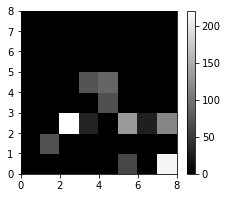

In [596]:
plt.figure(figsize = (3.5,3))
plt.gray()
plt.pcolor(result)
plt.colorbar()
plt.show()

In [597]:
X, Y = np.meshgrid(np.arange(1,9,1), np.arange(1,9,1))
data_1 = [[x,y,z] for x,y,z in zip(X.reshape((-1)).tolist(), Y.reshape((-1)).tolist(), tmpVal.reshape((-1)).tolist())]

#_data = list(create_surface3d_data())

surface3d = Surface3D(init_opts=opts.InitOpts(height="600px", 
                                              width="800px"))
surface3d.add(
    series_name="체압분포 데이터",
    shading="color",
    data=data_1,
    xaxis3d_opts=opts.Axis3DOpts(type_="value"),
    yaxis3d_opts=opts.Axis3DOpts(type_="value"),
    grid3d_opts=opts.Grid3DOpts(width=130, height=30, depth=130),)

surface3d.set_global_opts(title_opts=opts.TitleOpts(title="Scatter-VisualMap(Color)"),
                          visualmap_opts=opts.VisualMapOpts(dimension=2,
                                                            max_=256,
                                                            min_=0,
                                                            range_color=["#313695",
                                                                         "#4575b4",
                                                                         "#74add1",
                                                                         "#abd9e9",
                                                                         "#e0f3f8",
                                                                         "#ffffbf",
                                                                         "#fee090",
                                                                         "#fdae61",
                                                                         "#f46d43",
                                                                         "#d73027",
                                                                         "#a50026"],
                                                           )
                         )

surface3d.render_notebook()

In [585]:
X, Y = np.meshgrid(np.arange(1,9,1), np.arange(1,9,1))
data_1 = [[x,y,z] for x,y,z in zip(X.reshape((-1)).tolist(), Y.reshape((-1)).tolist(), tmpVal.reshape((-1)).tolist())]

#_data = list(create_surface3d_data())

bar3d = Bar3D(init_opts=opts.InitOpts(height="600px", 
                                              width="800px"))
bar3d.add(
    series_name="체압분포 데이터",
    shading="color",
    data=data_1,
    xaxis3d_opts=opts.Axis3DOpts(type_="value"),
    yaxis3d_opts=opts.Axis3DOpts(type_="value"),
    grid3d_opts=opts.Grid3DOpts(width=100, height=50, depth=100),)

bar3d.set_global_opts(title_opts=opts.TitleOpts(title="Scatter-VisualMap(Color)"),
                          visualmap_opts=opts.VisualMapOpts(dimension=2,
                                                            max_=256,
                                                            min_=0,
                                                            range_color=["#313695",
                                                                         "#4575b4",
                                                                         "#74add1",
                                                                         "#abd9e9",
                                                                         "#e0f3f8",
                                                                         "#ffffbf",
                                                                         "#fee090",
                                                                         "#fdae61",
                                                                         "#f46d43",
                                                                         "#d73027",
                                                                         "#a50026"],
                                                           )
                         )
bar3d.render_notebook()

In [591]:
data_1

[[1, 1, 0.0],
 [2, 1, 0.0],
 [3, 1, 0.0],
 [4, 1, 0.0],
 [5, 1, 0.0],
 [6, 1, 61.0],
 [7, 1, 0.0],
 [8, 1, 211.0],
 [1, 2, 0.0],
 [2, 2, 70.0],
 [3, 2, 0.0],
 [4, 2, 0.0],
 [5, 2, 0.0],
 [6, 2, 0.0],
 [7, 2, 0.0],
 [8, 2, 0.0],
 [1, 3, 0.0],
 [2, 3, 0.0],
 [3, 3, 220.0],
 [4, 3, 30.0],
 [5, 3, 0.0],
 [6, 3, 133.0],
 [7, 3, 27.0],
 [8, 3, 116.0],
 [1, 4, 0.0],
 [2, 4, 0.0],
 [3, 4, 0.0],
 [4, 4, 0.0],
 [5, 4, 68.0],
 [6, 4, 0.0],
 [7, 4, 0.0],
 [8, 4, 0.0],
 [1, 5, 0.0],
 [2, 5, 0.0],
 [3, 5, 0.0],
 [4, 5, 73.0],
 [5, 5, 87.0],
 [6, 5, 0.0],
 [7, 5, 0.0],
 [8, 5, 0.0],
 [1, 6, 0.0],
 [2, 6, 0.0],
 [3, 6, 0.0],
 [4, 6, 0.0],
 [5, 6, 0.0],
 [6, 6, 0.0],
 [7, 6, 0.0],
 [8, 6, 0.0],
 [1, 7, 0.0],
 [2, 7, 0.0],
 [3, 7, 0.0],
 [4, 7, 0.0],
 [5, 7, 0.0],
 [6, 7, 0.0],
 [7, 7, 0.0],
 [8, 7, 0.0],
 [1, 8, 0.0],
 [2, 8, 0.0],
 [3, 8, 0.0],
 [4, 8, 0.0],
 [5, 8, 0.0],
 [6, 8, 0.0],
 [7, 8, 0.0],
 [8, 8, 0.0]]

In [589]:
X

array([[1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8]])

In [590]:
Y

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8]])

In [586]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()
model.add(Conv2D(12, kernel_size=(5, 5), activation='relu', input_shape=(120, 60, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, kernel_size=(4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

2022-05-03 23:47:48.551195: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


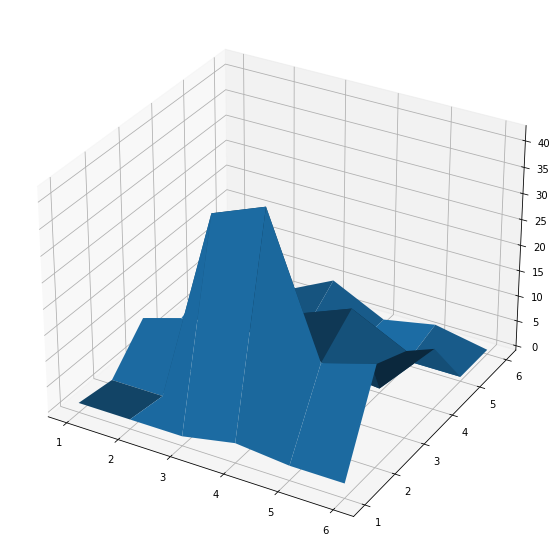

In [206]:
x = [1, 2, 3, 4, 5, 6] # np.arange(1, 6, 1)
y = [1, 2, 3, 4, 5, 6] #np.arange(1, 6, 1)
X,Y = np.meshgrid(x,y)
Z = result

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# Plot a 3D surface
ax.plot_surface(X, Y, Z)

plt.show()

In [158]:
surface3d.get_options()

{'animation': True,
 'animationThreshold': 2000,
 'animationDuration': 1000,
 'animationEasing': 'cubicOut',
 'animationDelay': 0,
 'animationDurationUpdate': 300,
 'animationEasingUpdate': 'cubicOut',
 'animationDelayUpdate': 0,
 'color': ['#c23531',
  '#2f4554',
  '#61a0a8',
  '#d48265',
  '#749f83',
  '#ca8622',
  '#bda29a',
  '#6e7074',
  '#546570',
  '#c4ccd3',
  '#f05b72',
  '#ef5b9c',
  '#f47920',
  '#905a3d',
  '#fab27b',
  '#2a5caa',
  '#444693',
  '#726930',
  '#b2d235',
  '#6d8346',
  '#ac6767',
  '#1d953f',
  '#6950a1',
  '#918597'],
 'series': [{'type': 'surface',
   'name': '체압분포 데이터',
   'data': [[1, 1, 0.0],
    [2, 1, 0.0],
    [3, 1, 6.0],
    [4, 1, 6.0],
    [5, 1, 5.0],
    [6, 1, 0.0],
    [1, 2, 5.0],
    [2, 2, 0.0],
    [3, 2, 23.0],
    [4, 2, 36.0],
    [5, 2, 32.0],
    [6, 2, 16.0],
    [1, 3, 3.0],
    [2, 3, 5.0],
    [3, 3, 5.0],
    [4, 3, 19.0],
    [5, 3, 20.0],
    [6, 3, 12.0],
    [1, 4, 0.0],
    [2, 4, 8.0],
    [3, 4, 4.0],
    [4, 4, 0.0],
    

In [356]:
X, Y = np.meshgrid(np.arange(0,6,1), np.arange(0,6,1))
[[x,y,z] for x,y,z in zip(X, Y, tmpVal.reshape((-1)))]

[[array([0, 1, 2, 3, 4, 5]), array([0, 0, 0, 0, 0, 0]), 351],
 [array([0, 1, 2, 3, 4, 5]), array([1, 1, 1, 1, 1, 1]), 200],
 [array([0, 1, 2, 3, 4, 5]), array([2, 2, 2, 2, 2, 2]), 0],
 [array([0, 1, 2, 3, 4, 5]), array([3, 3, 3, 3, 3, 3]), 0],
 [array([0, 1, 2, 3, 4, 5]), array([4, 4, 4, 4, 4, 4]), 0],
 [array([0, 1, 2, 3, 4, 5]), array([5, 5, 5, 5, 5, 5]), 0]]